### Loading modules

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets
import sklearn
import pprint
import plotly.express as px
import scipy

### Set the parameters of matplotlib

In [6]:
matplotlib.rcParams['font.size'] = 12
plt.style.use('dark_background')

### Load dataset

In [10]:
dataset = datasets.load_iris()

In [18]:
for elem in dataset.keys():
    print(elem, type(dataset[elem]))

data <class 'numpy.ndarray'>
target <class 'numpy.ndarray'>
frame <class 'NoneType'>
target_names <class 'numpy.ndarray'>
DESCR <class 'str'>
feature_names <class 'list'>
filename <class 'str'>
data_module <class 'str'>


In [60]:
ext_target = dataset.target[:, None]
df = pd.DataFrame(np.concatenate((dataset.data, ext_target, dataset.target_names[ext_target]), axis=1), columns=dataset.feature_names + ['ext_target', 'target_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ext_target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [107]:
features = dataset.data
target = dataset.target
print(features.shape, target.shape)

(150, 4) (150,)


### Visualise dataset

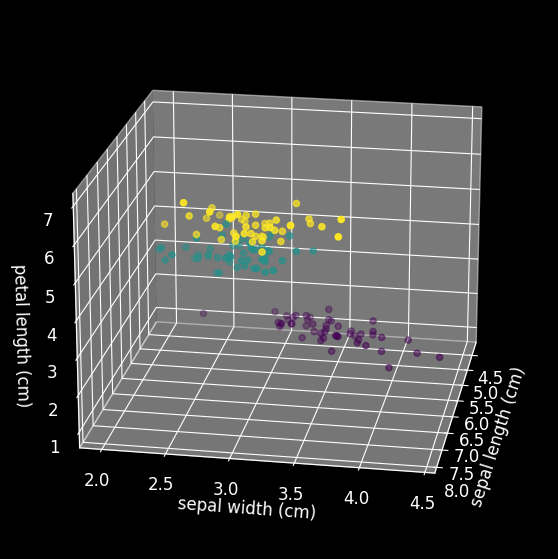

In [108]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(features[:,0], features[:,1], features[:,2], c=ext_target)
ax.set_xlabel(dataset.feature_names[0])
ax.set_ylabel(dataset.feature_names[1])
ax.set_zlabel(dataset.feature_names[2])
ax.view_init(elev=20, azim=10, roll=0)
plt.show(fig)



In [98]:
fig = plt.figure(figsize=(7,7))
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal width (cm)', color='target_names')
fig.show()

<Figure size 700x700 with 0 Axes>

### Feature distribution

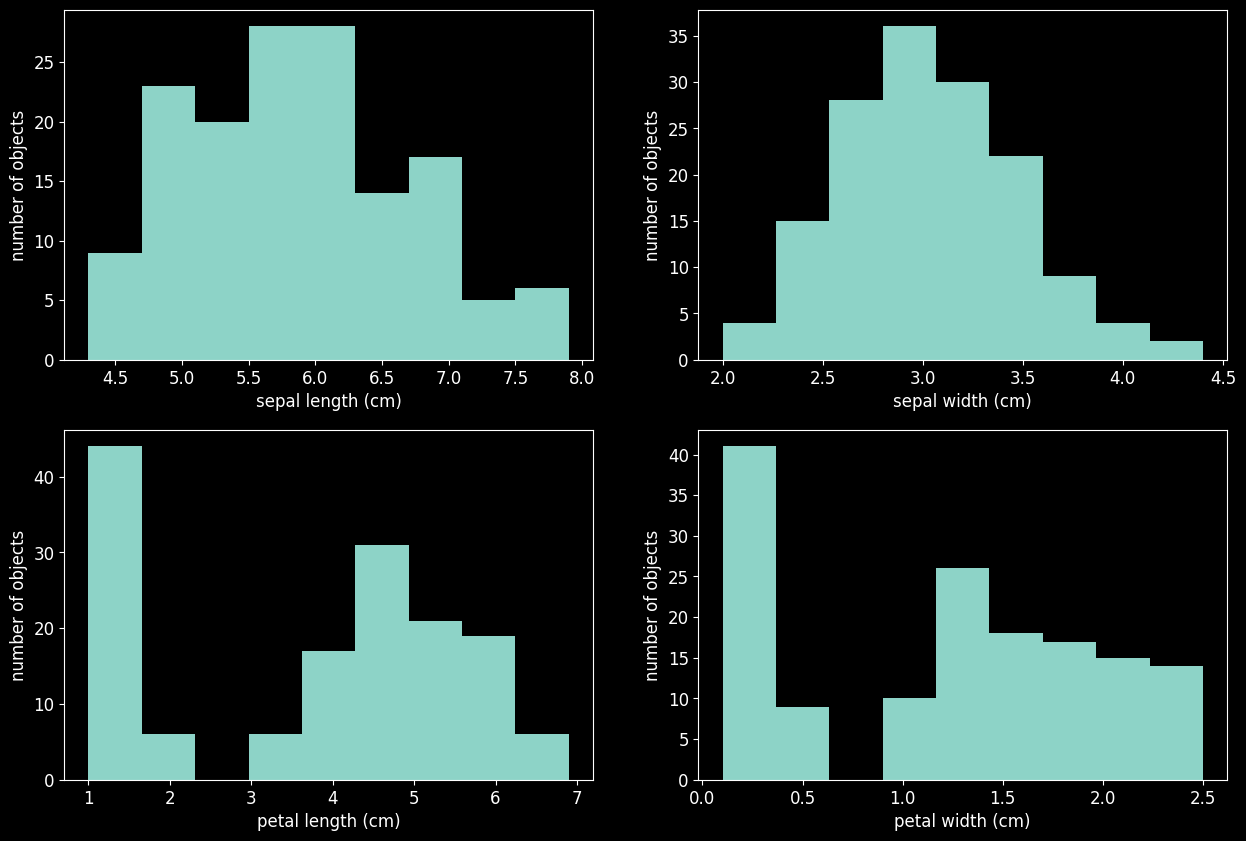

In [103]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, axis in enumerate(axes.flat):
    axis.hist(features[:, i], bins=9)
    axis.set_xlabel(dataset.feature_names[i])
    axis.set_ylabel('number of objects')

### Classifier based on the normal distribution (Gaussian Distribution)

$$
f(x, \sigma, \mu) = \frac{1}{\sqrt{2 \cdot \pi} \cdot \sigma} \cdot \exp(-\frac{(x - \mu)^2}{2 \cdot \sigma^2})
$$
After logarithm function of PDF we get following equation
$$
-0.5\cdot(2\cdot\pi\cdot\sigma^2) - \frac{(x - \mu)^2}{2\cdot\sigma^2}  
$$

In [128]:
class GaussianDistribution:
    def __init__(self, feature):
        """
        Args:
            feature: column of design matrix, represents all available values
            of features in axis=0 direction
        """
        self.mean = np.mean(feature, axis=0)
        self.std = np.std(feature, axis=0)

    def logpdf(self, value):
        """Logarithm of probability density function at value"""
        return -0.5 * np.log((2 * np.pi * self.std**2)) - (value - self.mean)**2 / (2 * self.std**2)

    def pdf(self, value):
        return np.exp(self.logpdf(value))

        

In [131]:
_test1 = scipy.stats.norm(loc=features[:, :2].mean(axis=0), scale=features[:, :2].std(axis=0))

_test2 = GaussianDistribution(features[:, :2])


np.allclose(_test2.logpdf(features[:5,:2]), _test1.logpdf(features[:5,:2]))

True